## Assignment A2- Data Wrangling, II

In [22]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Description of dataset:
The data set contains academic data of students from different streams and different levels of education. It displays marks of students in 3 categories:
1. Math Score
2. Reading Score
3. Writing Score

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Part 1: Treatment of missing values
The missing values will be replaced by the method of: Imputation by mean.
Using this approach, we compute the mean of a column’s non-missing values, and then replace the missing values in each column separately and independently of the others. 


In [25]:
print("The number of missing values per column are:")
data.isna().sum()

The number of missing values per column are:


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [26]:
 np.count_nonzero(data.isnull())   

0

As all missing data is only numerical, it can be replaced by the mean value of non-null rows to deal with missing values.

In [27]:
data["math score"] = data["math score"].replace(np.NaN, data["math score"].mean())
data["reading score"] = data["reading score"].replace(np.NaN, data["reading score"].mean())
data["writing score"] = data["writing score"].replace(np.NaN, data["writing score"].mean())

In [28]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

All missing data which was numerical was replaced by the mean value of non-null rows to deal with missing values. Hence, no missing values are present in dataset.

### Part 2: Detecting outliers
Z-score is just the number of standard deviations away from the mean that a certain data point is. Hence, if z-score comes out to be greater than the threshold of 3, the point is considered an outlier and removed.

In [31]:
print("Mean of math score:",data["math score"].mean())
print("Mean of reading score:",data["reading score"].mean())
print("Mean of writing score:",data["writing score"].mean())

Mean of math score: 66.089
Mean of reading score: 69.169
Mean of writing score: 68.054


In [33]:
print("Median of math score:",data["math score"].median())
print("Median of reading score:",data["reading score"].median())
print("Median of writing score:",data["writing score"].median())

Median of math score: 66.0
Median of reading score: 70.0
Median of writing score: 69.0


In [35]:
print("Standard Deivation of math score:",data["math score"].std())
print("Standard Deivation of reading score:",data["reading score"].std())
print("Standard Deivation of writing score:",data["writing score"].std())

Standard Deivation of math score: 15.163080096009468
Standard Deivation of reading score: 14.60019193725222
Standard Deivation of writing score: 15.195657010869642


Text(0.5, 1.0, 'Math Scores of Students')

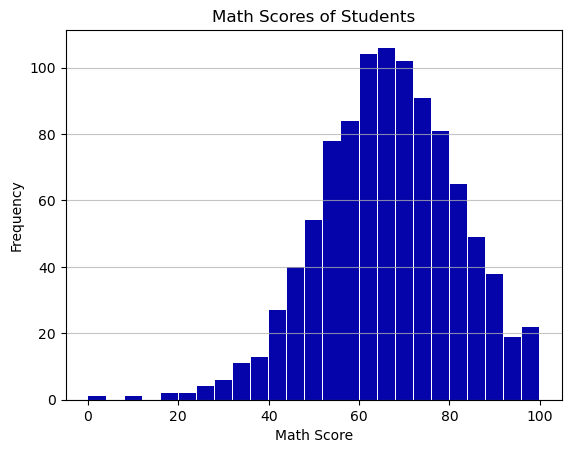

In [44]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=data["math score"], bins='auto', color='#0504aa', rwidth=0.95)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Scores of Students')

In [41]:
# Using z score to remove outliers
outliers=[]
def detectOutliers(data):
    threshold=3
    mean=data['math score'].mean()
    std=data['math score'].std()
    
    for i in data['math score']:
        z_score=(i-mean)/std;
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [42]:
# Using boxplot to remove outliers
Q1=np.percentile(data['math score'],25)
Q3=np.percentile(data['math score'],75)
IQR=Q3-Q1
upper_bound=Q3+IQR*1.5
lower_bound=Q1-IQR*1.5

outliers2=[]
for i in data['math score']:
    if(i<lower_bound or upper_bound<i):
        outliers2.append(i) 
        
print(outliers2) 

[18, 0, 22, 24, 26, 19, 23, 8]


In [43]:
m=detectOutliers(data)
print(m,data.shape)

[18, 0, 19, 8] (1000, 8)


In [13]:
indexAge = data[ (data['math score'].isin(m)) ].index
data.drop(indexAge , inplace=True)
data.shape

(995, 8)

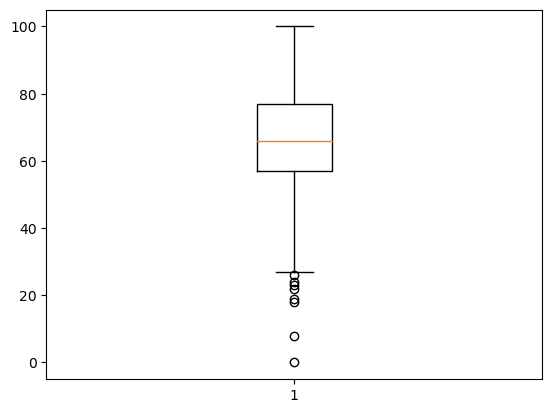

In [37]:
plt.boxplot(data['math score'])
plt.show()

Hence, 5 outliers based on math score have been removed using z-score.

### Part 3: Scaling data: To change scale for better understanding
Data Scaling is a data preprocessing step for numerical features. Data scaling is required to produce good results from . Various scalers are defined for this purpose like min-max scaler, standard scaler and robust scaler


In [29]:
from sklearn.preprocessing import MinMaxScaler # 0 to 1
scaler = MinMaxScaler()

numeric_data=['math score','reading score','writing score']
model=scaler.fit(data[numeric_data])
data[numeric_data]=model.transform(data[numeric_data])

data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.563830,0.711340,0.106884
1,female,group C,some college,standard,completed,0.531915,0.896907,0.132246
2,female,group B,master's degree,standard,none,0.755319,0.948454,0.141304
3,male,group A,associate's degree,free/reduced,none,0.297872,0.556701,0.052536
4,male,group C,some college,standard,none,0.606383,0.773196,0.108696
5,female,group B,associate's degree,standard,none,0.553191,0.824742,0.114130
6,female,group B,some college,standard,completed,0.734043,0.948454,0.139493
7,male,group B,some college,free/reduced,none,0.223404,0.412371,0.043478
8,male,group D,high school,free/reduced,completed,0.478723,0.628866,0.094203
9,female,group B,high school,free/reduced,none,0.202128,0.587629,0.063406


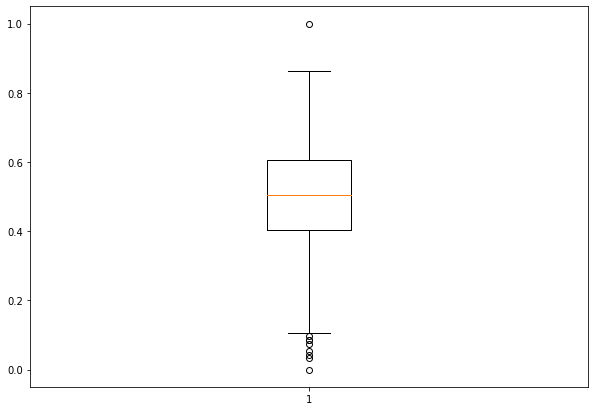

In [28]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['math score'])
plt.show()

### Checking skewness and using standard scaler

In [25]:
data[numeric_data].skew()

math score       -0.140992
reading score    -0.803827
writing score    11.609803
dtype: float64

In [30]:
from sklearn.preprocessing import StandardScaler # -1 to 1
scaler = StandardScaler()

numeric_data=['math score','reading score','writing score']
model=scaler.fit(data[numeric_data])
data[numeric_data]=model.transform(data[numeric_data])

data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.391297,0.240194,0.151403
1,female,group C,some college,standard,completed,0.186096,1.336507,0.627957
2,female,group B,master's degree,standard,none,1.622507,1.641039,0.798154
3,male,group A,associate's degree,free/reduced,none,-1.318716,-0.673400,-0.869784
4,male,group C,some college,standard,none,0.664899,0.605632,0.185442
5,female,group B,associate's degree,standard,none,0.322897,0.910163,0.287561
6,female,group B,some college,standard,completed,1.485706,1.641039,0.764115
7,male,group B,some college,free/reduced,none,-1.797520,-1.526088,-1.039981
8,male,group D,high school,free/reduced,completed,-0.155907,-0.247056,-0.086874
9,female,group B,high school,free/reduced,none,-1.934321,-0.490681,-0.665546


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

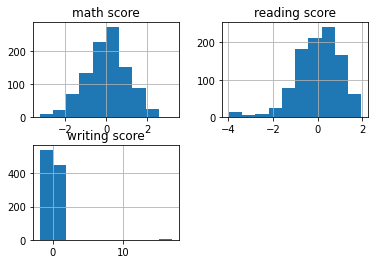

In [31]:
data[numeric_data].hist()